### DANI LITOVSKY ALCALA
### Chicago Tribute Policy Lab 

I spent about 50% of my time during the quarter analyzing the property appeals and sales data. The rest of the time I spent working on merging data. This document will provide all the code for the analysis. **A separate .py file will have the script for the final data merge.**

Please note that this notebook doesn't include every single analysis and line of code I did. These are the final, most useful ones and the most useful functions I composed.

### Appeals Analysis

In [2]:
import pandas as pd
import csv
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline  
import pylab
import os
import glob

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### At the beginning of the quarter, I added a clean_name column for others to use. Here is the code for that:

In [ ]:
def add_clean_name(df, file):
    try:
        df['clean_name']
        print "Clean column already exists in file " + file[54:]

    except KeyError:
        df["clean_name"] = df["attorneytaxrep"].str.replace("\.|\s|,", "")
        print "FINISHED cleaning lawyer names for file " + file[54:]

    return df

path = "your/path!"
files = glob.glob(path + "/*.csv")
for f in files:
    df = pd.read_csv(f,index_col=None, header=0)
    df = add_clean_name(df, f)
    df.to_csv(path + f[54:])

### Other useful functions

In [7]:
## useful functions
def clean(name, remove_spaces=True):
    '''
    Given a name string, return a clean name 
    that is lowercase and only alphabetic characters.

    If remove_spaces,
        returns "starbuckscoffeeco"
    if remove_spaces is False
        return "starbucks coffee co"
    '''
    lower = name.lower()
    if not remove_spaces:
        p = re.sub(r'\(([^\)]+)\)', '', lower)
        return re.sub(r'[^a-z ]', '', p).strip()

    else:
        p = re.sub(r'\(([^\)]+)\)', '', lower)
        return re.sub(r'[^a-z]', '', lower)
    
def print_statistics(data):
    '''
    Given a pandas dataframe, print dataframe statistics, correlation, and missing data.
    '''
    pd.set_option('display.width', 20)
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    print '**** column names:  ', "\n", data.columns.values
    #print '**** top of the data: ', "\n",  data.head()
    #print '**** dataframe shape: ', "\n", data.shape
    print '**** statistics: ', "\n", data.describe(include='all')
    #print '**** MODE: ', "\n", data.mode()
    print '**** sum of null values by column: ', "\n", data.isnull().sum()
    print '**** correlation matrix: ', "\n", data.corr()

In [3]:
## concatenating all appeals years
path = "/Users/Dani/Dropbox/Muni_Finance_Lab/Raw_Data/Appeals"

files = glob.glob(path + "/*.csv")
frame = pd.DataFrame()

list_ = []
for file_ in files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df = pd.concat(list_)

print "DONE CONCATINATING DATA"

DONE CONCATINATING DATA


In [5]:
print df.shape
df.head()

(2607270, 25)


,Unnamed: 0,pin,taxyear,appealnum,attorneytaxrep,prioir_av,proppose_av,assr_final,board_av,housenum,...,area,subarea,ass_win,bor_win,bor_rev,assr_rev,total_rev,classification,win,clean_name
0,0,1011010200000,2003,164,"KEARNEY & PHELAN, LTD.",59618,59618,59618,48260,117,...,1,101,0,1,11358,0,11358,517,1,KEARNEY&PHELANLTD
1,1,1011020010000,2003,142,RIEFF & SCHRAMM,114882,114882,114882,114882,105,...,1,101,0,0,0,0,0,592,0,RIEFF&SCHRAMM
2,2,1011020050000,2003,142,RIEFF & SCHRAMM,124517,124517,124517,124517,207,...,1,101,0,0,0,0,0,592,0,RIEFF&SCHRAMM
3,3,1011030020000,2003,145,EUGENE L. GRIFFIN & ASSOCIATES,492099,871480,563336,492097,257,...,1,101,1,1,71239,308144,379383,591,1,EUGENELGRIFFIN&ASSOCIATES
4,4,1011030030000,2003,26,"MCCRACKEN,WALSH,DELAVEN & HETLER",321977,609040,386419,386419,301,...,1,101,1,0,0,222621,222621,592,1,MCCRACKENWALSHDELAVEN&HETLER


In [6]:
### filter ONLY for % revision
df = df[df["proppose_av"] != 0]

## Creating dfs
df["%_rev"] = df["total_rev"] / df["proppose_av"]
df15 = pd.read_csv(path + "/appeals15.csv",index_col=None, header=0)
df["class_type"] = df["classification"].apply(lambda x: str(x)[0])
df_2_5 = df[(df["class_type"] == "2") | (df["class_type"] == "5")]
df_2 = df[(df["class_type"] == "2")]
df_5 = df[(df["class_type"] == "5")]

/Library/Python/2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
df15["attorneytaxrep"].str.replace("\.|\s", "")

1

### Appeals per year

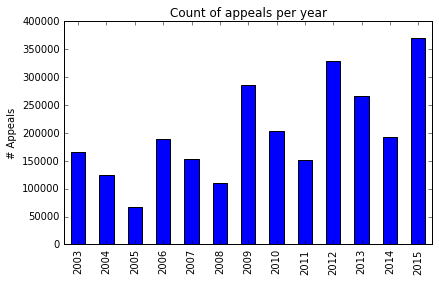

In [9]:
ax = pd.value_counts(df["taxyear"], sort=False).plot(kind = "bar", title = "Count of appeals per year")
plt.tight_layout()
ax.set_ylabel("# Appeals")
#plt.savefig(os.getcwd()  + "/results/appeals-per-year.png")

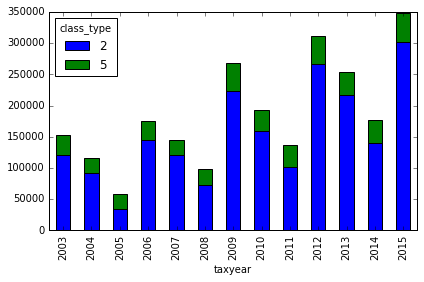

In [10]:
df_2_5.groupby(['taxyear','class_type']).size().unstack().plot(kind = "bar", stacked=True)
plt.tight_layout()
#plt.savefig(os.getcwd() + "/results/appeals-class2-5.png")

In [11]:
# condos = 299
# create new variable of condo, not condo
df_2["condo"] = np.where(df_2['classification'] == 299, 1, 0)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


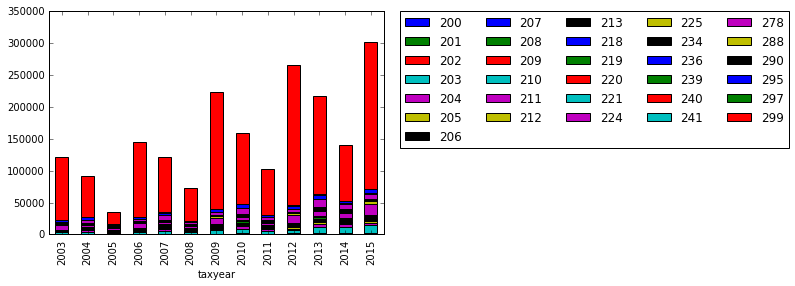

In [12]:
df_2.groupby(['taxyear','classification']).size().unstack().plot(kind = "bar", stacked=True)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 5)
#plt.savefig(os.getcwd() + "/results/appeals-condo.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


## Below we can compute according to TRI, given tax data has been merged in:

In [8]:
df.groupby(['taxyear','TRI']).size().unstack().plot(kind = "bar", stacked=True)
plt.tight_layout()

Index([u'Unnamed: 0', u'pin', u'taxyear', u'appealnum', u'attorneytaxrep',
       u'prioir_av', u'proppose_av', u'assr_final', u'board_av', u'housenum',
       u'dir', u'street_name', u'street_suffix', u'city_name', u'zip', u'area',
       u'subarea', u'ass_win', u'bor_win', u'bor_rev', u'assr_rev',
       u'total_rev', u'classification', u'win', u'clean_name', u'%_rev',
       u'class_type'],
      dtype='object')

In [ ]:
df.groupby(['taxyear_x','TRI']).mean()['%_rev'].unstack().plot(kind = "bar", stacked=True)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.tight_layout()

In [ ]:
df_2.groupby(['taxyear','condo']).size().groupby(level=0).apply(lambda x: 100*x/float(x.sum())).unstack()

In [ ]:
def remove_dup_merge(df1_duplicates, df2, duplicate_cols, match_cols):
    """ use with sales_df, appeals_df, ["pin"], ["pin"] """
    
    df1_duplicates = df1_duplicates.drop_duplicates(duplicate_cols)
    merged = df2.merge(df1_duplicates, on = match_cols, how = "outer")
    
    return merged

def add_class_type_col(df, classif_column):
    """
    in appeals data, classification column = classification
    in sales data, classification column = bor_class
    """

    df["class_type"] = df[classif_column].apply(lambda x: str(x)[0])

def keep_2_5_only(df):
    final = df[(df["class_type"] == "2") | (df["class_type"] == "5")]
    
    return final

def analysis_year(year):
    # year == 
    path = "/Users/Dani/Dropbox/Muni_Finance_Lab/Raw_Data/Appeals"
    appeals = pd.read_csv(path + "/appeals%s.csv" %year ,index_col=None, header=0)

    path = "/Users/Dani/Dropbox/Muni_Finance_Lab/Raw_Data/Sales_Ratios/1st_pass"
    sales = pd.read_csv(path + "/res%s.csv" %year)

    df = remove_dup_merge(sales, appeals, ["pin"], ["pin"])

    ##  homes that SOLD but didn't appeal - no appealsnum
    a= df[pd.isnull(df['appealnum'])].shape

    ## pin10 is only in sales data,  that APPEALED ONLY - no pin10
    b = df[pd.isnull(df['pin10'])].shape

    df['matched'] = np.where((pd.notnull(df["p1_majclass"])) & (pd.notnull(df["appealnum"])), 1, 0)

    ## sold only 
    df['sold'] = np.where(pd.isnull(df["appealnum"]), 1, 0)

    print "median netconsideration appealed ", df[df['matched'] == 1]["NetConsideration"].median()
    print "median netconsideration sold ", df[df['sold'] == 1]["NetConsideration"].median()
    print "median p1_valratio appealed ", df[df['matched'] == 1]["p1_valratio"].median()
    print "median p1_valratio sold ", df[df['sold'] == 1]["p1_valratio"].median()
    


    #those who won have a bit higher sales ratio
    print "median netcons for lost / won ", df[df['matched'] == 1].groupby(["win"])["NetConsideration"].median()

    # those who won have a higher netconsideration
    print "median p1_valratio for lost / won ", df[df['matched'] == 1].groupby(["win"])["p1_valratio"].median()

    # those who won have a higher propoose_av
    print "count for lost / won ", df[df['matched'] == 1].groupby(["win"])["NetConsideration"].count()
    
    return df

### Given the functions above, we can run a general analysis for all years

#### just call the analysis_year function with a two digit year

In [ ]:
df15 = analysis_year(15)

#### Code for the appeals-tax-sale-community data merge is in the data_merge.py file